#### One Hot Encoding:

In [1]:
import re
import pandas as pd
from tqdm import tqdm
import nltk
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import STOPWORDS, ImageColorGenerator, WordCloud
import matplotlib.pyplot as plt
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')
%matplotlib inline


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\joelj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\joelj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\joelj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv("../data/train.csv", delimiter=",", usecols=["text","sentiment"])
data.head(5)

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [3]:
data.isnull().sum()

text         1
sentiment    0
dtype: int64

In [4]:
data.dropna(axis=0,inplace=True)
data.reset_index(drop=True, inplace=True)

In [5]:
data.isnull().sum()

text         0
sentiment    0
dtype: int64

In [6]:
stem = WordNetLemmatizer()
for index in tqdm(range(len(data['text']))):
    words = word_tokenize(data['text'][index])
    words = [word.lower() for word in words]
    words = " ".join(stem.lemmatize(str(word)) for word in words if word not in stopwords.words('english'))
    words = re.sub('[^a-zA-Z0-9]+', " ", words)
    words = re.sub('([/s]+){2,}',"",words)
    data.loc[index,'text'] = words
print(data.head(5))

  0%|          | 0/27480 [00:00<?, ?it/s]

100%|██████████| 27480/27480 [02:27<00:00, 186.61it/s]

                             text sentiment
0                 responded going   neutral
1          sooo sad mi san diego   negative
2                   bos bullying   negative
3           interview leave alone  negative
4  son put release already bought  negative


In [10]:
frequency = {}
for index in range(len(data['text'])):
    for word in data['text'][index].split():
        if word in frequency.keys():
            frequency[word] += 1
            continue
        frequency[word] = 1

In [11]:
print(frequency)

{'responded': 1, 'going': 1103, 'sooo': 113, 'sad': 488, 'mi': 652, 'san': 20, 'diego': 11, 'bos': 22, 'bullying': 1, 'interview': 31, 'leave': 141, 'alone': 88, 'son': 51, 'put': 156, 'release': 22, 'already': 244, 'bought': 73, 'http': 1249, 'www': 122, 'dothebouncy': 1, 'com': 897, 'smf': 1, 'shamele': 1, 'plugging': 3, 'best': 314, 'ranger': 5, 'forum': 13, 'earth': 23, '2am': 7, 'feeding': 5, 'baby': 184, 'fun': 541, 'smile': 57, 'coo': 2, 'soooo': 73, 'high': 73, 'journey': 12, 'wow': 204, 'u': 1214, 'became': 10, 'cooler': 6, 'hehe': 81, 'poible': 24, 'much': 664, 'love': 1223, 'hopeful': 7, 'reckon': 6, 'chance': 59, 'minimal': 2, 'p': 249, 'never': 298, 'gon': 445, 'na': 712, 'get': 1526, 'cake': 67, 'stuff': 162, 'really': 915, 'like': 1380, 'song': 231, 'story': 59, 'taylor': 30, 'swift': 11, 'sharpie': 1, 'running': 80, 'dangerously': 1, 'low': 39, 'ink': 3, 'want': 838, 'go': 1359, 'music': 158, 'tonight': 490, 'lost': 159, 'voice': 33, 'test': 73, 'lg': 4, 'env2': 1, 'uh'

In [14]:
frequency = dict(sorted(frequency.items(), key=lambda item: item[1], reverse=True))
print(frequency)

{'day': 2451, 'good': 1580, 'get': 1526, 'like': 1380, 'go': 1359, 'http': 1249, 'got': 1247, 'love': 1223, 'u': 1214, 'work': 1199, 'today': 1155, 'going': 1103, 'time': 1097, 'one': 1074, 'lol': 1027, 'happy': 996, 'know': 969, 'back': 917, 'really': 915, 'com': 897, 'im': 884, 'want': 838, 'see': 817, 'night': 811, 'mother': 795, 'think': 749, 'new': 748, 'home': 746, '2': 736, 'well': 717, 'na': 712, 'still': 689, 'oh': 682, 'thanks': 678, 'much': 664, 'need': 654, 'mi': 652, 'hope': 624, 'great': 621, 'make': 614, 'feel': 604, 'last': 599, 'morning': 585, 'haha': 568, 'wish': 559, 'twitter': 548, 'week': 547, 'fun': 541, 'tomorrow': 518, 'would': 515, '3': 494, 'thing': 492, 'sorry': 491, 'tonight': 490, 'sad': 488, 'bad': 482, 'come': 470, 'look': 469, 'right': 469, 'friend': 455, 'gon': 445, 'yeah': 440, 'nice': 438, 'say': 437, 'though': 429, 'way': 421, 'sleep': 420, 'mom': 420, 'better': 419, 'weekend': 417, 'could': 403, 'bit': 393, 'getting': 390, 'bed': 384, 'people': 384,

In [17]:
count = 0
bar = {}
for key,value in frequency.items():
    if count == 20:
        break
    bar[key] = value
    count += 1
print(bar)

{'day': 2451, 'good': 1580, 'get': 1526, 'like': 1380, 'go': 1359, 'http': 1249, 'got': 1247, 'love': 1223, 'u': 1214, 'work': 1199, 'today': 1155, 'going': 1103, 'time': 1097, 'one': 1074, 'lol': 1027, 'happy': 996, 'know': 969, 'back': 917, 'really': 915, 'com': 897}


AttributeError: 'int' object has no attribute 'items'

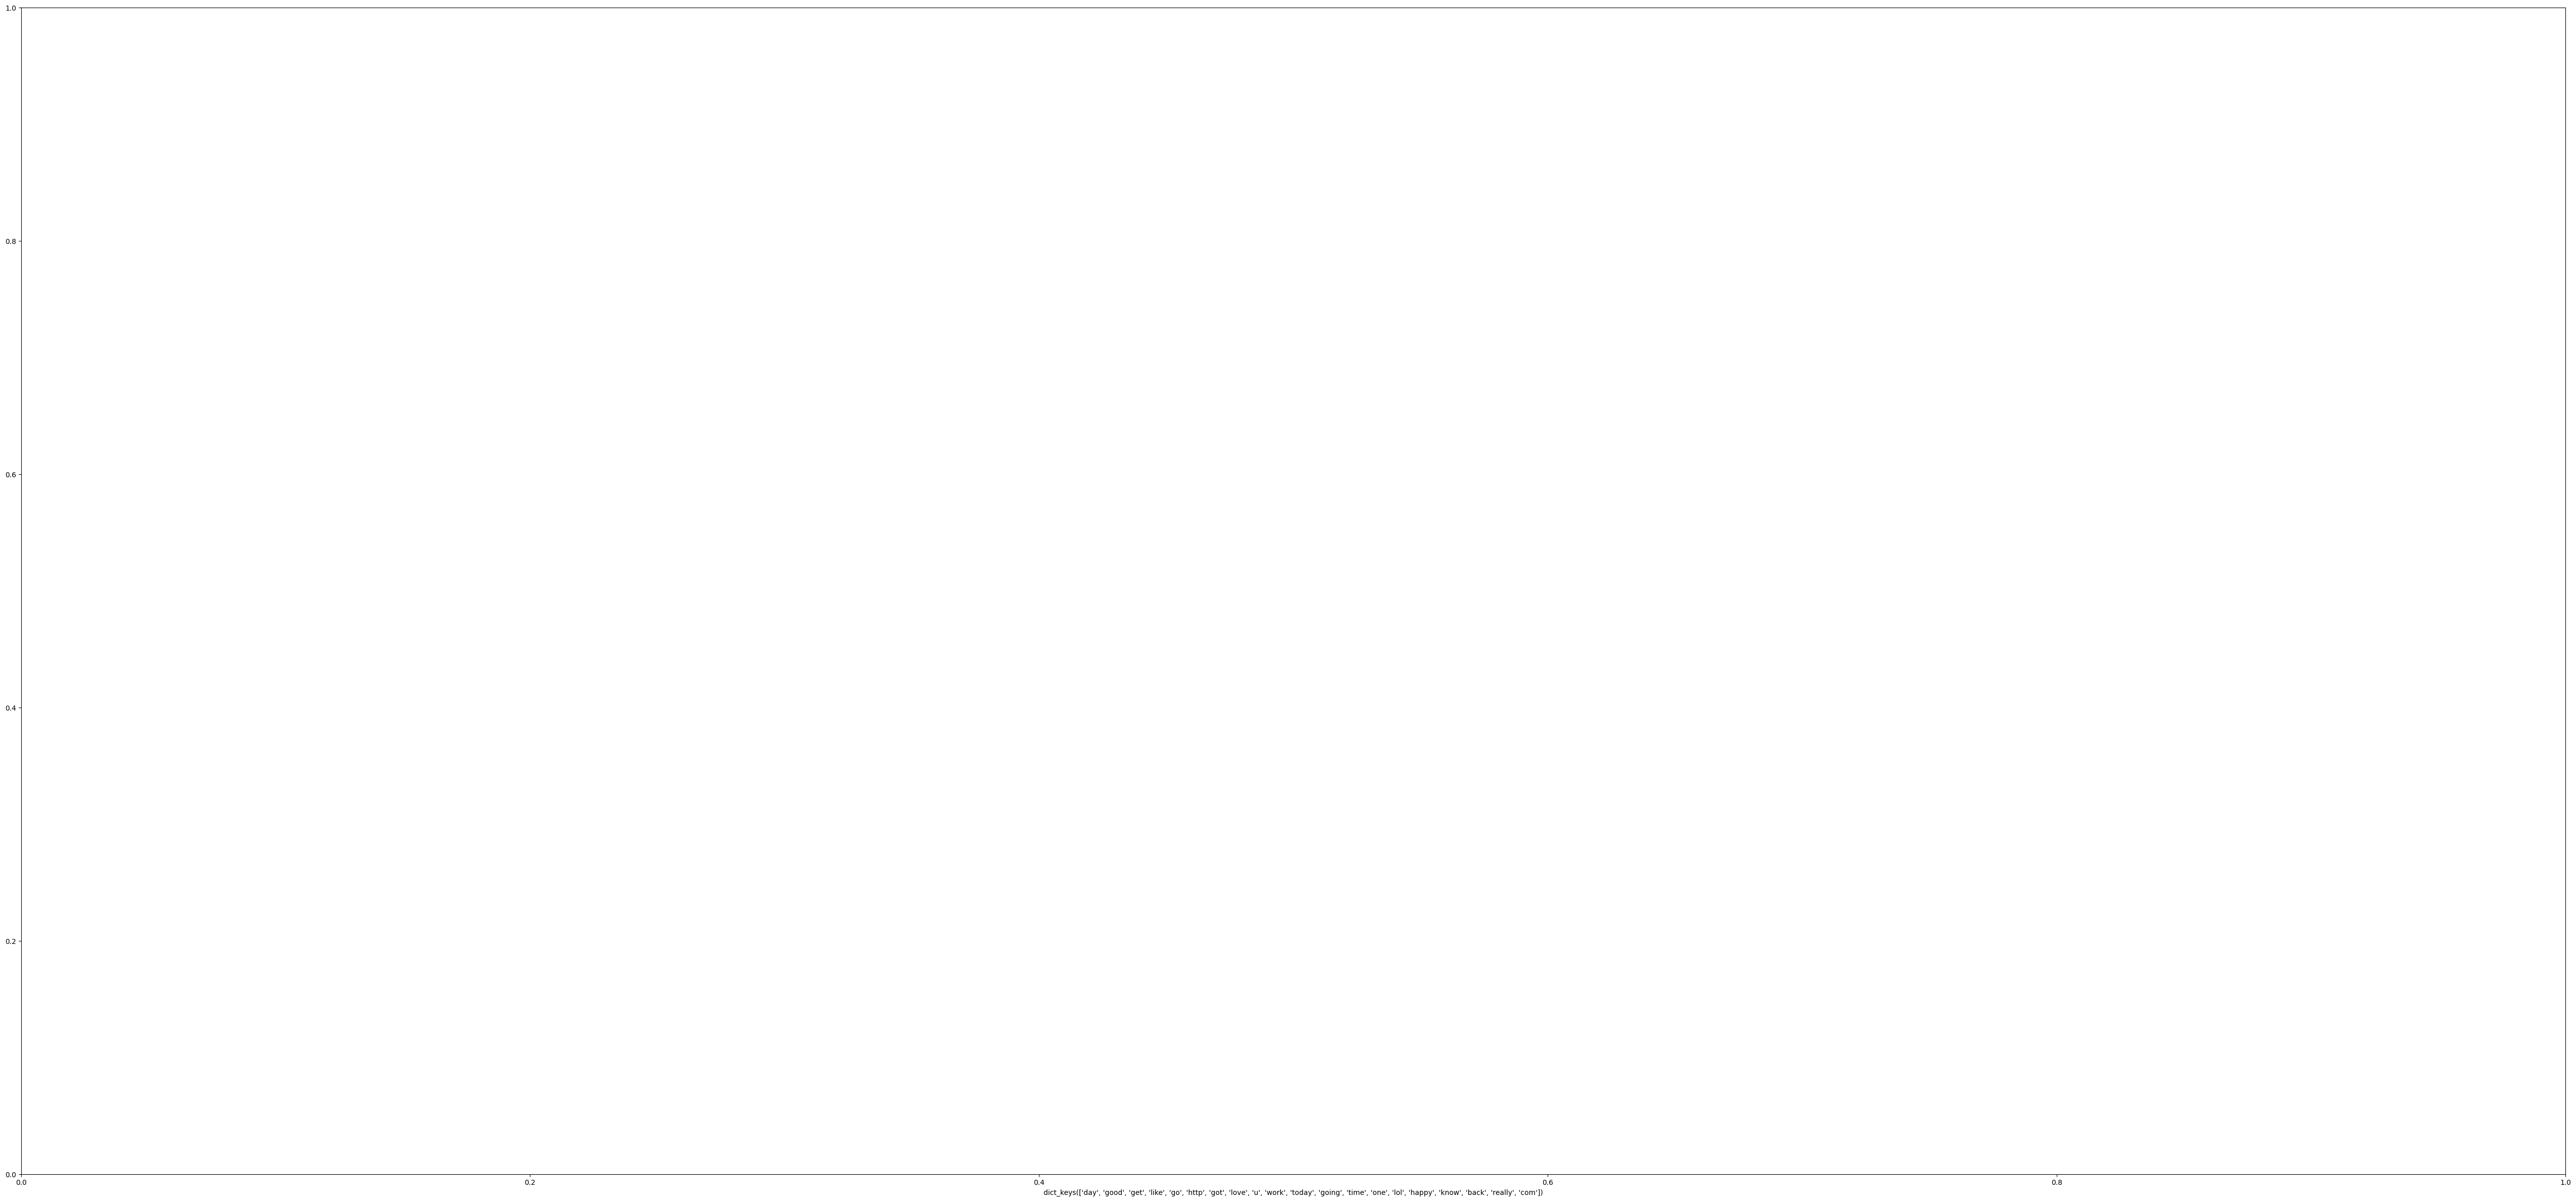

In [ ]:
plt.figure(figsize=(65,30))
plt.xscale
# plt.text()
# plt.
plt.bar(bar.keys(),bar.values(),align="center")
plt.show()

In [ ]:
word_cloud = WordCloud().generate()
plt.imshow(word_cloud, interpolation='bilinear')

TypeError: expected string or bytes-like object